# RFM анализ с Python
1. [Определение/загрузка нужных библиотек и данных](#Libraries)
1. [Первичный анализ](#FirstStep)
1. [Добавление новых значений](#NewData) 
1. [Создание вспомогательных таблиц](#Tables) 
1. [Отчет и визуализация](#Report)


---
<a id="Libraries"></a>
## 1. Загрузка библиотек и данных 

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import re

In [4]:
data = pd.read_excel('C:/Users/Covid2019/Desktop/ГИГБРАЙНС/7 урок пандс/Online Retail.xlsx')

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


---
<a id="FirstStep"></a>
## 2. Первичный анализ

- InvoiceNo: Invoice number. Nominal, a 6-digit integral number uniquely assigned to each transaction. If this code starts with letter 'c', it indicates a cancellation.
- StockCode: Product (item) code. Nominal, a 5-digit integral number uniquely assigned to each distinct product.
- Description: Product (item) name. Nominal.
- Quantity: The quantities of each product (item) per transaction. Numeric.
- InvoiceDate: Invice Date and time. Numeric, the day and time when each transaction was generated.
- UnitPrice: Unit price. Numeric, Product price per unit in sterling.
- CustomerID: Customer number. Nominal, a 5-digit integral number uniquely assigned to each customer.
- Country: Country name. Nominal, the name of the country where each customer resides.

In [9]:
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [10]:
data.Country.value_counts()

United Kingdom          495478
Germany                   9495
France                    8557
EIRE                      8196
Spain                     2533
Netherlands               2371
Belgium                   2069
Switzerland               2002
Portugal                  1519
Australia                 1259
Norway                    1086
Italy                      803
Channel Islands            758
Finland                    695
Cyprus                     622
Sweden                     462
Unspecified                446
Austria                    401
Denmark                    389
Japan                      358
Poland                     341
Israel                     297
USA                        291
Hong Kong                  288
Singapore                  229
Iceland                    182
Canada                     151
Greece                     146
Malta                      127
United Arab Emirates        68
European Community          61
RSA                         58
Lebanon 

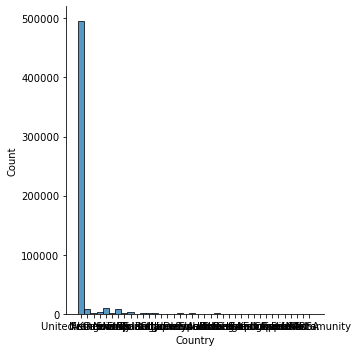

In [11]:
sns.displot(data=data, x="Country")
plt.show()

In [12]:
top_10_countries = list(data.Country.value_counts().index[1:11])

In [13]:
top_10_countries 

['Germany',
 'France',
 'EIRE',
 'Spain',
 'Netherlands',
 'Belgium',
 'Switzerland',
 'Portugal',
 'Australia',
 'Norway']

In [14]:
data_top10 = data.loc[data['Country'].isin(top_10_countries)].copy() #если мы хотим только топ-10 стран

In [15]:
data_top10.Country.value_counts()

Germany        9495
France         8557
EIRE           8196
Spain          2533
Netherlands    2371
Belgium        2069
Switzerland    2002
Portugal       1519
Australia      1259
Norway         1086
Name: Country, dtype: int64

In [16]:
data_top10.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 39087 entries, 26 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   InvoiceNo    39087 non-null  object        
 1   StockCode    39087 non-null  object        
 2   Description  39087 non-null  object        
 3   Quantity     39087 non-null  int64         
 4   InvoiceDate  39087 non-null  datetime64[ns]
 5   UnitPrice    39087 non-null  float64       
 6   CustomerID   38146 non-null  float64       
 7   Country      39087 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 2.7+ MB


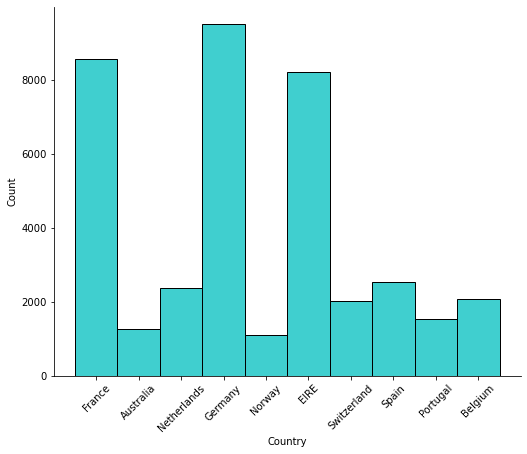

In [17]:
pic = sns.displot(data=data_top10, x="Country", color="c")
pic.set_xticklabels(rotation=45)
pic.fig.set_figwidth(8)
pic.fig.set_figheight(6)
plt.show()

In [18]:
data_top10.Description.value_counts()

POSTAGE                                978
REGENCY CAKESTAND 3 TIER               296
ROUND SNACK BOXES SET OF4 WOODLAND     287
PLASTERS IN TIN WOODLAND ANIMALS       204
PLASTERS IN TIN CIRCUS PARADE          185
                                      ... 
TUSCAN VILLA BIRD FEEDER                 1
WRAP, CAROUSEL                           1
UNION STRIPE CUSHION COVER               1
ENGLISH ROSE SCENTED HANGING FLOWER      1
GLASS CHALICE GREEN  LARGE               1
Name: Description, Length: 2808, dtype: int64

In [19]:
data_top10.InvoiceDate #смотрим с какого числа по какое у нас есть данные

26       2010-12-01 08:45:00
27       2010-12-01 08:45:00
28       2010-12-01 08:45:00
29       2010-12-01 08:45:00
30       2010-12-01 08:45:00
                 ...        
541904   2011-12-09 12:50:00
541905   2011-12-09 12:50:00
541906   2011-12-09 12:50:00
541907   2011-12-09 12:50:00
541908   2011-12-09 12:50:00
Name: InvoiceDate, Length: 39087, dtype: datetime64[ns]

---
<a id="NewData"></a>
## 3. Добавление новых значений

In [20]:
data_top10.reset_index(inplace=True)

In [21]:
data_top10.head()

,index,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,26,536370,22728,ALARM CLOCK BAKELIKE PINK,24,2010-12-01 08:45:00,3.75,12583.0,France
1,27,536370,22727,ALARM CLOCK BAKELIKE RED,24,2010-12-01 08:45:00,3.75,12583.0,France
2,28,536370,22726,ALARM CLOCK BAKELIKE GREEN,12,2010-12-01 08:45:00,3.75,12583.0,France
3,29,536370,21724,PANDA AND BUNNIES STICKER SHEET,12,2010-12-01 08:45:00,0.85,12583.0,France
4,30,536370,21883,STARS GIFT TAPE,24,2010-12-01 08:45:00,0.65,12583.0,France


### Отделяем номер чека и категорию

In [22]:
string = 'C539576'
int(re.findall(r'\d+', str(string))[0])

539576

In [287]:
def creat_string_with_numbers(string):
    """
    функция вытаскивает из строки номер заказа 
    """
    int(re.findall(r'\d+', str(string))[0])

    return string

In [288]:
def creat_string_with_code(string):
    """
    функция вытаскивает из строки категорию заказа а если категрия (С или А) не указана - проставляет N
    """
    if re.findall(r'c', str(string), flags=re.IGNORECASE): 
        string = 'C'
    elif re.findall(r'a', str(string), flags=re.IGNORECASE):
        string = 'A'
    else:
        string = 'N'
    return string

In [289]:
data_top10['InvoiceNumber'] = [creat_string_with_numbers(number) for number in data_top10['InvoiceNo']]

In [290]:
data_top10['InvoiceCode'] = [creat_string_with_code(number) for number in data_top10['InvoiceNo']]

In [291]:
data_top10.head()

,index,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,InvoiceNumber,InvoiceCode
0,26,536370,22728,ALARM CLOCK BAKELIKE PINK,24,2010-12-01 08:45:00,3.75,12583.0,France,536370,N
1,27,536370,22727,ALARM CLOCK BAKELIKE RED,24,2010-12-01 08:45:00,3.75,12583.0,France,536370,N
2,28,536370,22726,ALARM CLOCK BAKELIKE GREEN,12,2010-12-01 08:45:00,3.75,12583.0,France,536370,N
3,29,536370,21724,PANDA AND BUNNIES STICKER SHEET,12,2010-12-01 08:45:00,0.85,12583.0,France,536370,N
4,30,536370,21883,STARS GIFT TAPE,24,2010-12-01 08:45:00,0.65,12583.0,France,536370,N


In [346]:
data_top10.InvoiceCode.value_counts()

N    37948
C     1139
Name: InvoiceCode, dtype: int64

In [294]:
data_top10.describe()

,index,Quantity,UnitPrice,CustomerID
count,39087.000000,39087.000000,39087.000000,38146.000000
mean,274807.326400,19.701538,4.764918,13174.518639
std,146102.277523,45.018238,49.199668,1001.093496
min,26.000000,-480.000000,0.000000,12350.000000
25%,151559.500000,4.000000,1.250000,12490.000000
50%,284340.000000,10.000000,1.950000,12662.000000
75%,392620.500000,16.000000,3.750000,14156.000000
max,541908.000000,2400.000000,4161.060000,17097.000000


In [295]:
# Valid Price
valid_price = data_top10.UnitPrice >= 0 #цена валидна


# Valid Description
valid_desc = data_top10.Description.notnull() #есть название товара


# Valid CID
valid_CID = data_top10.CustomerID.notnull() #номер покупателя присутствует


# Invoice type-N (Normal)
inv_N = data_top10.InvoiceCode == "N" #обычный чек


# Invoice type-C (Cancellation)
inv_C = data_top10.InvoiceCode == "C" #отмена заказа


# Invoice type-N (Amendment)
inv_A = data_top10.InvoiceCode == "A" #изменение


# Quantity Negative
q_neg = data_top10.Quantity < 0 #негативное количество (можем предположить что это в случае возврата)

# Quantity Positive
q_pos = data_top10.Quantity >= 0  

In [296]:
#валидный набор элементов: есть цена, описание и номер покупателя
p1 = valid_price & valid_desc & valid_CID


#валидный набор элементов-2 - есть обычный чек и позитивное количество элементов
p2 = inv_N & q_pos


#невалидный набор данных отмена или изменение заказа и негативная цена
p3 = (inv_A | inv_C) & q_neg


#собираем все сеты в один - copy() 
retail_pp = data_top10.loc[p1 & (p2 | p3)].copy()

retail_pp.head()

,index,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,InvoiceNumber,InvoiceCode
0,26,536370,22728,ALARM CLOCK BAKELIKE PINK,24,2010-12-01 08:45:00,3.75,12583.0,France,536370,N
1,27,536370,22727,ALARM CLOCK BAKELIKE RED,24,2010-12-01 08:45:00,3.75,12583.0,France,536370,N
2,28,536370,22726,ALARM CLOCK BAKELIKE GREEN,12,2010-12-01 08:45:00,3.75,12583.0,France,536370,N
3,29,536370,21724,PANDA AND BUNNIES STICKER SHEET,12,2010-12-01 08:45:00,0.85,12583.0,France,536370,N
4,30,536370,21883,STARS GIFT TAPE,24,2010-12-01 08:45:00,0.65,12583.0,France,536370,N


---
<a id="#Tables"></a>
## 4. Создание вспомогательных таблиц

In [297]:
retail_pp['month'] = retail_pp['InvoiceDate'].dt.month #выводим месяц

In [298]:
retail_pp['year'] = retail_pp['InvoiceDate'].dt.year #выводим год

In [299]:
retail_pp['Revenue'] = retail_pp['Quantity']*retail_pp['UnitPrice'] #считаем выручку для каждой позии (цена*количество)

In [300]:
retail_pp

,index,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,InvoiceNumber,InvoiceCode,month,year,Revenue
0,26,536370,22728,ALARM CLOCK BAKELIKE PINK,24,2010-12-01 08:45:00,3.75,12583.0,France,536370,N,12,2010,90.00
1,27,536370,22727,ALARM CLOCK BAKELIKE RED,24,2010-12-01 08:45:00,3.75,12583.0,France,536370,N,12,2010,90.00
2,28,536370,22726,ALARM CLOCK BAKELIKE GREEN,12,2010-12-01 08:45:00,3.75,12583.0,France,536370,N,12,2010,45.00
3,29,536370,21724,PANDA AND BUNNIES STICKER SHEET,12,2010-12-01 08:45:00,0.85,12583.0,France,536370,N,12,2010,10.20
4,30,536370,21883,STARS GIFT TAPE,24,2010-12-01 08:45:00,0.65,12583.0,France,536370,N,12,2010,15.60
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39082,541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France,581587,N,12,2011,10.20
39083,541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France,581587,N,12,2011,12.60
39084,541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France,581587,N,12,2011,16.60
39085,541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France,581587,N,12,2011,16.60


### 1. Revenue - собираем за каждый месяц и год

In [301]:
m_kpis = pd.DataFrame(retail_pp.groupby([retail_pp.year, retail_pp.month])['Revenue'].sum())

In [302]:
m_kpis.head()

Revenue
year month           
2010 12      52879.15
2011 1      107816.82
     2       71262.14
     3       99924.97
     4       34288.78

### 2. Добавляем колонку где считаем изменения месяц к месяцу

In [303]:
m_kpis['MonthlyGrowth'] = m_kpis['Revenue'].pct_change()

In [304]:
m_kpis

Revenue  MonthlyGrowth
year month                          
2010 12      52879.15            NaN
2011 1      107816.82       1.038929
     2       71262.14      -0.339044
     3       99924.97       0.402217
     4       34288.78      -0.656855
     5      111947.24       2.264836
     6      122888.28       0.097734
     7       88048.75      -0.283506
     8      120678.50       0.370587
     9      141207.54       0.170113
     10     164131.78       0.162344
     11     150182.91      -0.084986
     12      40826.43      -0.728155

### 3. Считаем активных покупателей

In [305]:
m_kpis['ActiveCustomers'] = pd.DataFrame(retail_pp.groupby([retail_pp.year,retail_pp.month])['CustomerID'].nunique())
m_kpis

Revenue  MonthlyGrowth  ActiveCustomers
year month                                           
2010 12      52879.15            NaN               61
2011 1      107816.82       1.038929               84
     2       71262.14      -0.339044               64
     3       99924.97       0.402217               77
     4       34288.78      -0.656855               58
     5      111947.24       2.264836               78
     6      122888.28       0.097734               88
     7       88048.75      -0.283506               74
     8      120678.50       0.370587               85
     9      141207.54       0.170113              108
     10     164131.78       0.162344              110
     11     150182.91      -0.084986              131
     12      40826.43      -0.728155               52

### 4. Считаем сколько всего покупок в месяц

In [306]:
m_kpis['MonthlyOrderCount'] = pd.DataFrame(retail_pp.groupby([retail_pp.year,retail_pp.month])['Quantity'].sum())
m_kpis

Revenue  MonthlyGrowth  ActiveCustomers  MonthlyOrderCount
year month                                                              
2010 12      52879.15            NaN               61              31687
2011 1      107816.82       1.038929               84              62505
     2       71262.14      -0.339044               64              42613
     3       99924.97       0.402217               77              57729
     4       34288.78      -0.656855               58              17783
     5      111947.24       2.264836               78              64813
     6      122888.28       0.097734               88              74721
     7       88048.75      -0.283506               74              49725
     8      120678.50       0.370587               85              74342
     9      141207.54       0.170113              108              81706
     10     164131.78       0.162344              110              97447
     11     150182.91      -0.084986              131              82675
     12      40826.43      -0.728155               52              24705

### 5. Считаем среднее количество товаров в чеке

In [307]:
m_kpis['MonthlyOrderAverage'] =  pd.DataFrame(retail_pp.groupby([retail_pp.year,retail_pp.month])['Revenue'].mean())
m_kpis

Revenue  MonthlyGrowth  ActiveCustomers  MonthlyOrderCount  \
year month                                                                 
2010 12      52879.15            NaN               61              31687   
2011 1      107816.82       1.038929               84              62505   
     2       71262.14      -0.339044               64              42613   
     3       99924.97       0.402217               77              57729   
     4       34288.78      -0.656855               58              17783   
     5      111947.24       2.264836               78              64813   
     6      122888.28       0.097734               88              74721   
     7       88048.75      -0.283506               74              49725   
     8      120678.50       0.370587               85              74342   
     9      141207.54       0.170113              108              81706   
     10     164131.78       0.162344              110              97447   
     11     150182.91      -0.084986              131              82675   
     12      40826.43      -0.728155               52              24705   

            MonthlyOrderAverage  
year month                       
2010 12               26.992930  
2011 1                38.852908  
     2                39.069156  
     3                39.002721  
     4                24.079199  
     5                38.965277  
     6                40.094055  
     7                33.076165  
     8                36.747412  
     9                33.477368  
     10               33.044449  
     11               29.424551  
     12               28.569930

### Переименовываем индекс чтобы было видно месяц и год

In [309]:
m_kpis.index.set_names(['Year', 'Month'], inplace = True)
m_kpis

Revenue  MonthlyGrowth  ActiveCustomers  MonthlyOrderCount  \
Year Month                                                                 
2010 12      52879.15            NaN               61              31687   
2011 1      107816.82       1.038929               84              62505   
     2       71262.14      -0.339044               64              42613   
     3       99924.97       0.402217               77              57729   
     4       34288.78      -0.656855               58              17783   
     5      111947.24       2.264836               78              64813   
     6      122888.28       0.097734               88              74721   
     7       88048.75      -0.283506               74              49725   
     8      120678.50       0.370587               85              74342   
     9      141207.54       0.170113              108              81706   
     10     164131.78       0.162344              110              97447   
     11     150182.91      -0.084986              131              82675   
     12      40826.43      -0.728155               52              24705   

            MonthlyOrderAverage  
Year Month                       
2010 12               26.992930  
2011 1                38.852908  
     2                39.069156  
     3                39.002721  
     4                24.079199  
     5                38.965277  
     6                40.094055  
     7                33.076165  
     8                36.747412  
     9                33.477368  
     10               33.044449  
     11               29.424551  
     12               28.569930

In [310]:
m_kpis.index

MultiIndex([(2010, 12),
            (2011,  1),
            (2011,  2),
            (2011,  3),
            (2011,  4),
            (2011,  5),
            (2011,  6),
            (2011,  7),
            (2011,  8),
            (2011,  9),
            (2011, 10),
            (2011, 11),
            (2011, 12)],
           names=['Year', 'Month'])

### 6. Делаем дата-фрейм с первой покупкой покупателя

In [311]:
customer_fist_purchase = retail_pp.groupby('CustomerID').InvoiceDate.min().reset_index()

customer_fist_purchase.columns = ['CustomerID','FirstPurchaseDate']

customer_fist_purchase['FirstPurchaseYearMonth'] = customer_fist_purchase['FirstPurchaseDate'].map(lambda date: 100*date.year                                                                                                +date.month)

In [312]:
customer_fist_purchase

,CustomerID,FirstPurchaseDate,FirstPurchaseYearMonth
0,12350.0,2011-02-02 16:01:00,201102
1,12352.0,2011-02-16 12:33:00,201102
2,12354.0,2011-04-21 13:11:00,201104
3,12356.0,2011-01-18 09:50:00,201101
4,12357.0,2011-11-06 16:07:00,201111
...,...,...,...
301,14335.0,2011-09-04 13:07:00,201109
302,14646.0,2010-12-20 10:09:00,201012
303,14911.0,2010-12-01 14:05:00,201012
304,16321.0,2011-01-20 12:11:00,201101


---
<a id="#Report"></a>
## 4. Отчет и визуализация

In [314]:
#Складываем две таблицы - с первой покупкой и с retail_pp
retail_ppp = pd.merge(retail_pp, customer_fist_purchase, on='CustomerID')

retail_ppp['Date'] = pd.to_datetime(retail_ppp.InvoiceDate.dt.date)

retail_ppp.head()

,index,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,InvoiceNumber,InvoiceCode,month,year,Revenue,FirstPurchaseDate,FirstPurchaseYearMonth,Date
0,26,536370,22728,ALARM CLOCK BAKELIKE PINK,24,2010-12-01 08:45:00,3.75,12583.0,France,536370,N,12,2010,90.0,2010-12-01 08:45:00,201012,2010-12-01
1,27,536370,22727,ALARM CLOCK BAKELIKE RED,24,2010-12-01 08:45:00,3.75,12583.0,France,536370,N,12,2010,90.0,2010-12-01 08:45:00,201012,2010-12-01
2,28,536370,22726,ALARM CLOCK BAKELIKE GREEN,12,2010-12-01 08:45:00,3.75,12583.0,France,536370,N,12,2010,45.0,2010-12-01 08:45:00,201012,2010-12-01
3,29,536370,21724,PANDA AND BUNNIES STICKER SHEET,12,2010-12-01 08:45:00,0.85,12583.0,France,536370,N,12,2010,10.2,2010-12-01 08:45:00,201012,2010-12-01
4,30,536370,21883,STARS GIFT TAPE,24,2010-12-01 08:45:00,0.65,12583.0,France,536370,N,12,2010,15.6,2010-12-01 08:45:00,201012,2010-12-01


In [315]:
retail_ppp.CustomerID.value_counts()

14911.0    5903
14646.0    2085
14156.0    1420
12415.0     778
12681.0     646
           ... 
12665.0       4
12603.0       3
12605.0       3
12791.0       2
12503.0       1
Name: CustomerID, Length: 306, dtype: int64

In [316]:
#Создаем новую колонку - пока по дефолту все пользователи - New
retail_ppp['UserType'] = 'New'

In [317]:
retail_ppp.head()

,index,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,InvoiceNumber,InvoiceCode,month,year,Revenue,FirstPurchaseDate,FirstPurchaseYearMonth,Date,UserType
0,26,536370,22728,ALARM CLOCK BAKELIKE PINK,24,2010-12-01 08:45:00,3.75,12583.0,France,536370,N,12,2010,90.0,2010-12-01 08:45:00,201012,2010-12-01,New
1,27,536370,22727,ALARM CLOCK BAKELIKE RED,24,2010-12-01 08:45:00,3.75,12583.0,France,536370,N,12,2010,90.0,2010-12-01 08:45:00,201012,2010-12-01,New
2,28,536370,22726,ALARM CLOCK BAKELIKE GREEN,12,2010-12-01 08:45:00,3.75,12583.0,France,536370,N,12,2010,45.0,2010-12-01 08:45:00,201012,2010-12-01,New
3,29,536370,21724,PANDA AND BUNNIES STICKER SHEET,12,2010-12-01 08:45:00,0.85,12583.0,France,536370,N,12,2010,10.2,2010-12-01 08:45:00,201012,2010-12-01,New
4,30,536370,21883,STARS GIFT TAPE,24,2010-12-01 08:45:00,0.65,12583.0,France,536370,N,12,2010,15.6,2010-12-01 08:45:00,201012,2010-12-01,New


In [318]:
retail_ppp.UserType.value_counts()

New    38146
Name: UserType, dtype: int64

In [319]:
#Создаем колонку ['YearMonth'] в нужном формате
retail_ppp['YearMonth'] = retail_ppp['InvoiceDate'].map(lambda date: 100*date.year + date.month)

In [320]:
retail_ppp['FirstPurchaseYearMonth']

0        201012
1        201012
2        201012
3        201012
4        201012
          ...  
38141    201112
38142    201112
38143    201112
38144    201112
38145    201112
Name: FirstPurchaseYearMonth, Length: 38146, dtype: int64

In [321]:
retail_ppp['YearMonth']

0        201012
1        201012
2        201012
3        201012
4        201012
          ...  
38141    201112
38142    201112
38143    201112
38144    201112
38145    201112
Name: YearMonth, Length: 38146, dtype: int64

In [322]:
#Теперь мы можем добавить пользователей с другим статусом!
retail_ppp.loc[retail_ppp['YearMonth'] > retail_ppp['FirstPurchaseYearMonth'],'UserType'] = 'Existing'

In [323]:
retail_ppp.UserType.value_counts()

Existing    28313
New          9833
Name: UserType, dtype: int64

In [324]:
#Считаем Revenue для каждого типа пользователя
customer_kpis = pd.DataFrame(retail_ppp.groupby([retail_ppp.year,retail_ppp.month, retail_ppp.UserType])['Revenue'].sum())
customer_kpis.index.set_names(['Year', 'Month', 'UserType'], inplace = True)
customer_kpis

Revenue
Year Month UserType           
2010 12    New        52879.15
2011 1     Existing   72196.00
           New        35620.82
     2     Existing   57862.79
           New        13399.35
     3     Existing   87683.05
           New        12241.92
     4     Existing   26931.96
           New         7356.82
     5     Existing   91921.70
           New        20025.54
     6     Existing  101379.93
           New        21508.35
     7     Existing   79320.69
           New         8728.06
     8     Existing  109057.34
           New        11621.16
     9     Existing  124952.31
           New        16255.23
     10    Existing  149941.59
           New        14190.19
     11    Existing  136915.65
           New        13267.26
     12    Existing   39491.38
           New         1335.05

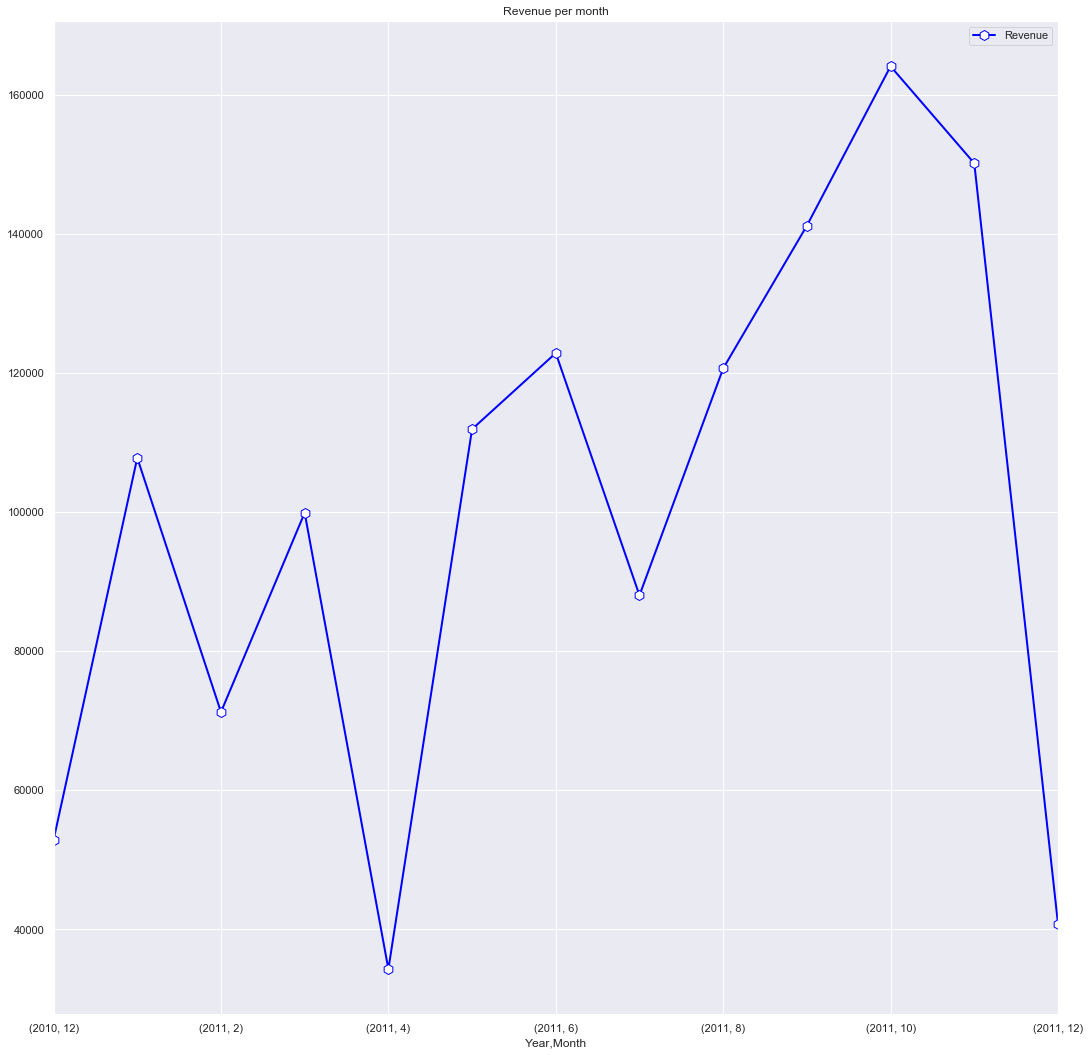

In [330]:
#Смотрим выручку по месяцам
m_kpis.plot.line(y='Revenue', title='Revenue per month', color = 'blue',
         marker='h', 
         markersize=10, linewidth=2,
         markerfacecolor='white')
plt.show()

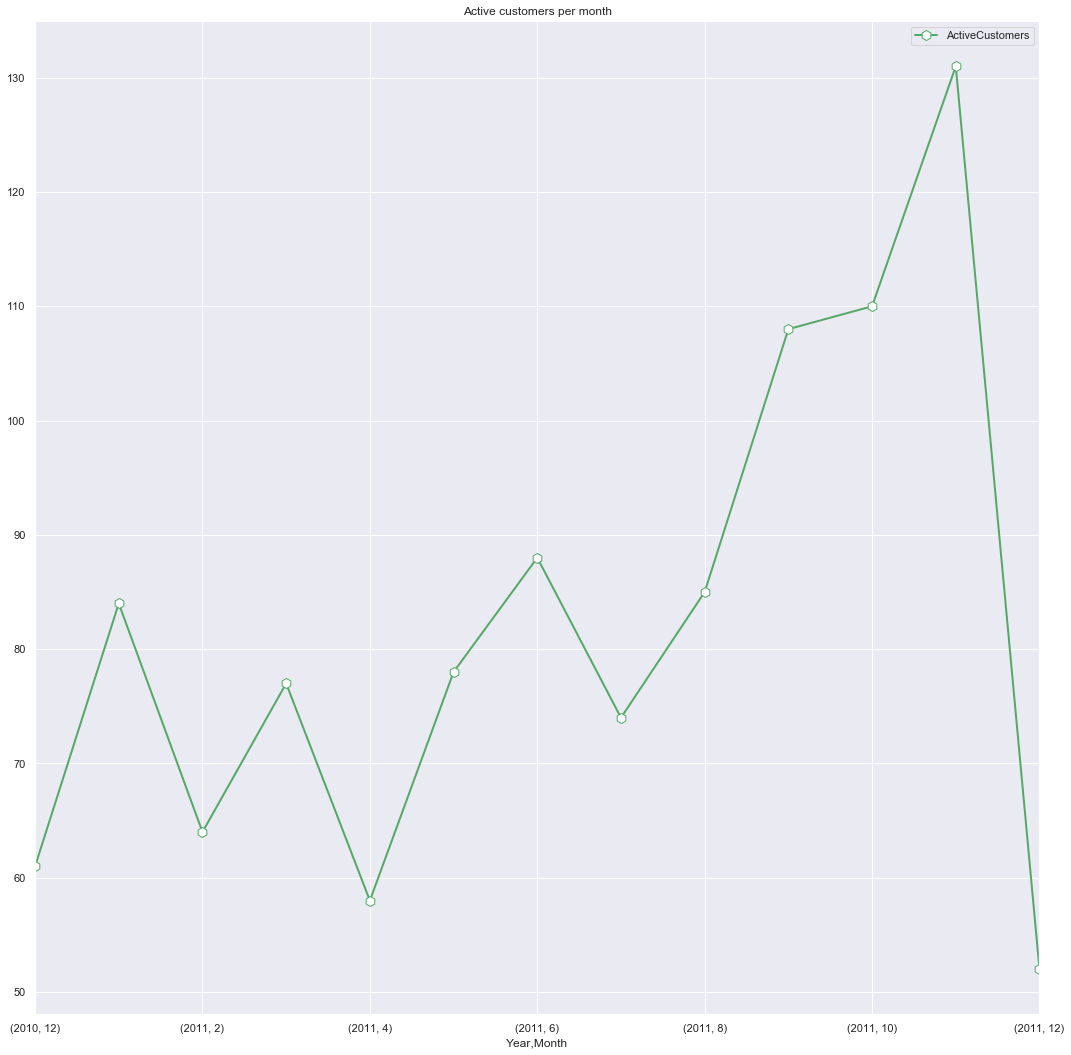

In [331]:
#Визуализируем активных покупателей
m_kpis.plot.line(y='ActiveCustomers', title='Active customers per month',color = 'g',
         marker='h', 
         markersize=10, linewidth=2,
         markerfacecolor='white');

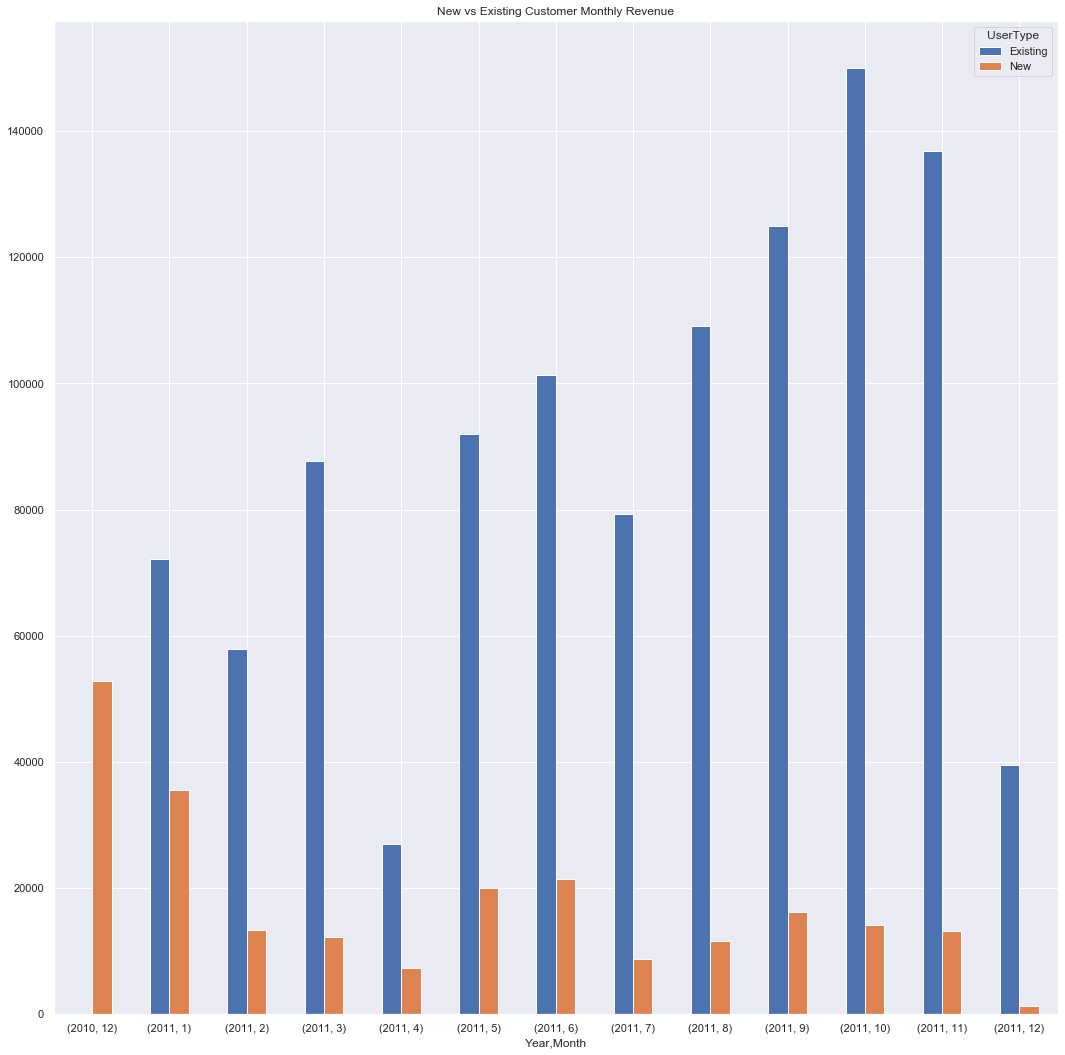

In [332]:
#Сравниваем новых и вернувшихся
customer_kpis.unstack().plot.bar(y='Revenue', title='New vs Existing Customer Monthly Revenue', rot=0);

In [333]:
#Создаем новый дата-фрейм основываясь на CustomerID 
customer = pd.DataFrame(retail_pp['CustomerID'].unique())
customer.columns = ['CustomerID']


#Последний чек InvoiceDate.max() значит последний как раз, то есть самый поздний (groupby = CustomerID)
recency = retail_ppp.groupby('CustomerID').InvoiceDate.max().reset_index()
recency.columns = ['CustomerID','LastPurchaseDate']


# Максимальное значение (самая свежая покупка)
LastInvoiceDate = recency['LastPurchaseDate'].max()


# Новизна покупки для каждого покупателя по сравнениею с LastInvoiceDate 
recency['Recency'] = (LastInvoiceDate - recency['LastPurchaseDate']).dt.days



customer = pd.merge(customer, recency[['CustomerID','Recency']], on='CustomerID')


customer.head()

,CustomerID,Recency
0,12583.0,2
1,12431.0,35
2,12791.0,373
3,12662.0,0
4,12433.0,0


In [334]:
# Считаем количество чеков на каждого покупателя 
frequency = retail_ppp.groupby('CustomerID').InvoiceDate.count().reset_index()
frequency.columns = ['CustomerID','Frequency']

customer = pd.merge(customer, frequency, on='CustomerID')

In [263]:
customer

,CustomerID,Recency,Frequency
0,12583.0,2,251
1,12431.0,35,240
2,12791.0,373,2
3,12662.0,0,232
4,12433.0,0,420
...,...,...,...
301,12479.0,3,35
302,12660.0,10,13
303,12442.0,2,12
304,12650.0,2,20


In [335]:
# Группируем выручку по покупателю (per Customer ID)
revenue = retail_ppp.groupby('CustomerID').Revenue.sum().reset_index()

customer = pd.merge(customer, revenue, on='CustomerID')


customer.head()

,CustomerID,Recency,Frequency,Revenue
0,12583.0,2,251,7187.34
1,12431.0,35,240,6416.39
2,12791.0,373,2,192.60
3,12662.0,0,232,3817.08
4,12433.0,0,420,13375.87


In [336]:
customer.sort_values('Revenue', ascending = False) #сортируем

,CustomerID,Recency,Frequency,Revenue
54,14646.0,1,2085,2.794890e+05
5,14911.0,0,5903,1.325726e+05
61,12415.0,23,778,1.237254e+05
8,14156.0,9,1420,1.133841e+05
39,12731.0,23,277,1.879341e+04
...,...,...,...,...
165,12506.0,232,23,7.350000e+01
80,12665.0,324,4,6.175000e+01
275,12454.0,52,30,-5.684342e-14
38,12605.0,364,3,-7.500000e+00


In [337]:
customer["Revenue"] = customer["Revenue"].astype(int) #приводим к int виду

In [338]:
customer.sort_values('Revenue', ascending = False)

,CustomerID,Recency,Frequency,Revenue
54,14646.0,1,2085,279489
5,14911.0,0,5903,132572
61,12415.0,23,778,123725
8,14156.0,9,1420,113384
39,12731.0,23,277,18793
...,...,...,...,...
165,12506.0,232,23,73
80,12665.0,324,4,61
275,12454.0,52,30,0
38,12605.0,364,3,-7
